# Exploratory Data Analytics

In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
import plotly.express as px

In [4]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/media/omkar/DATA1/timeseries/data/', kind="zip")

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [7]:
data = pd.read_csv("data/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv",encoding='ISO-8859-1')

In [11]:
data.head(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [10]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [12]:
def parse_date(x):
    return datetime.strptime(x,'%Y %m %d %H')

In [15]:
data = pd.read_csv("data/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv",\
                   encoding='ISO-8859-1',parse_dates=[['year','month','day','hour']], \
                   date_parser=parse_date,keep_date_col=True)

In [17]:
data.drop(columns=["No"],inplace=True)

In [18]:
data

,year_month_day_hour,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017-02-28 20:00:00,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017-02-28 21:00:00,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017-02-28 22:00:00,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [19]:
data1 = data.copy()

In [37]:
data.set_index("year_month_day_hour",inplace=True)

,year_month_day_hour,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017-02-28 20:00:00,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017-02-28 21:00:00,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017-02-28 22:00:00,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [41]:
data.loc['2013':'2014']

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,7.0,37.0,2.0,2.0,300.0,69.0,-2.3,1015.0,-24.8,0.0,NW,2.2,Dingling
2014-12-31 20:00:00,2014,12,31,20,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,1014.0,-24.3,0.0,NNW,2.3,Dingling
2014-12-31 21:00:00,2014,12,31,21,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,1012.0,-23.5,0.0,NW,1.4,Dingling


In [38]:
pmdata =  data['PM2.5']

<AxesSubplot:xlabel='year_month_day_hour'>

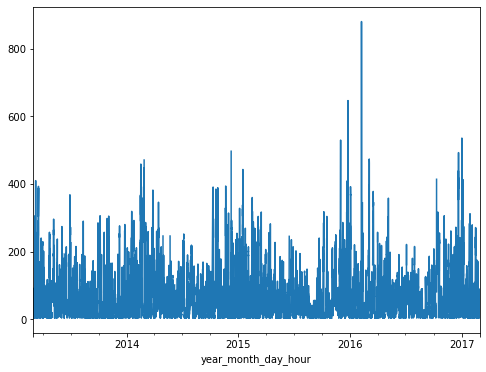

In [52]:
pmdata.plot()

There are hight value of pm2.5 during Winter and rainy season


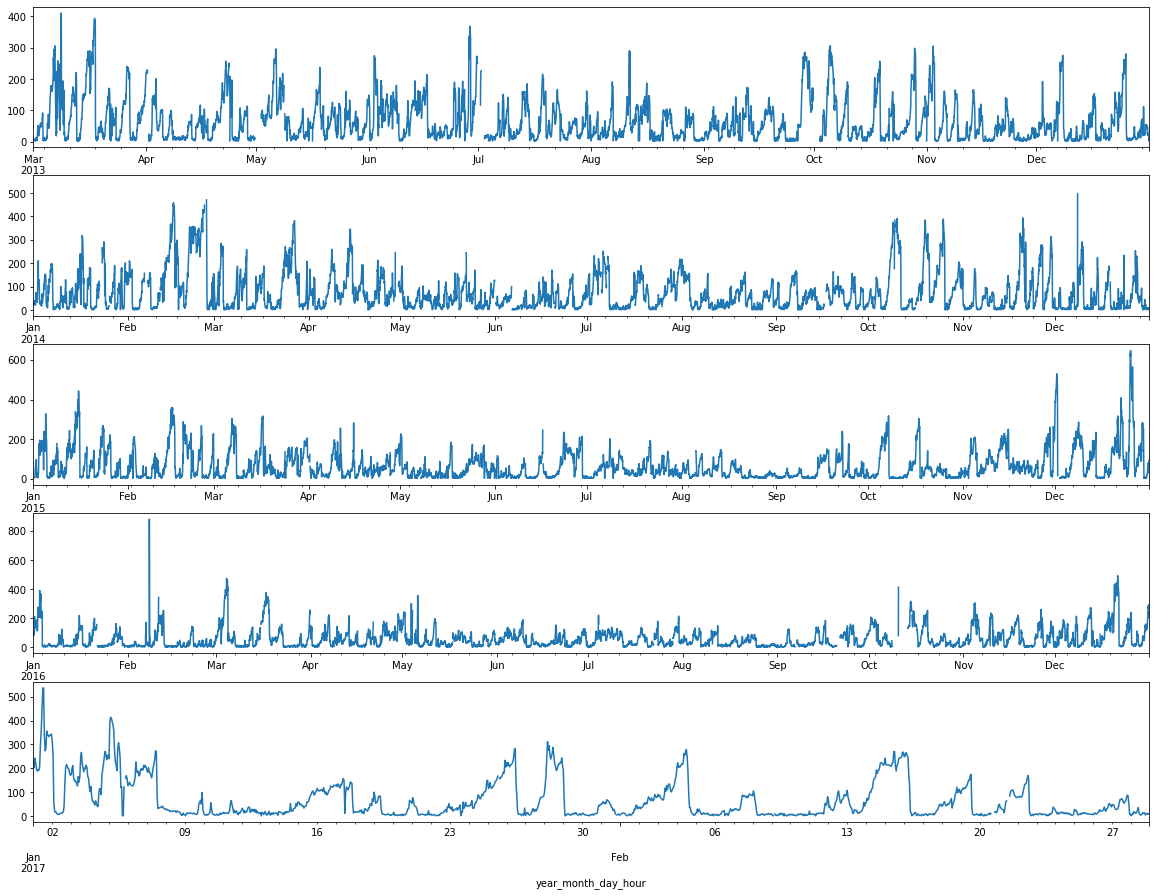

In [78]:
data13 = pmdata.loc['2013']
data14 = pmdata.loc['2014']
data15 = pmdata.loc['2015']
data16 = pmdata.loc['2016']
data17 = pmdata.loc['2017']

plt.figure(figsize=(20,15))
plt.subplot(5, 1, 1)
data13.plot()
plt.subplot(5, 1, 2)
data14.plot()
plt.subplot(5, 1, 3)
data15.plot()
plt.subplot(5, 1, 4)
data16.plot()
plt.subplot(5, 1, 5)
data17.plot()

print("There are hight value of pm2.5 during Winter and rainy season")

In [89]:
fig = px.line(data1, x=data1['year_month_day_hour'], y=data1['PM2.5'], color=data1['year'])
fig.show()

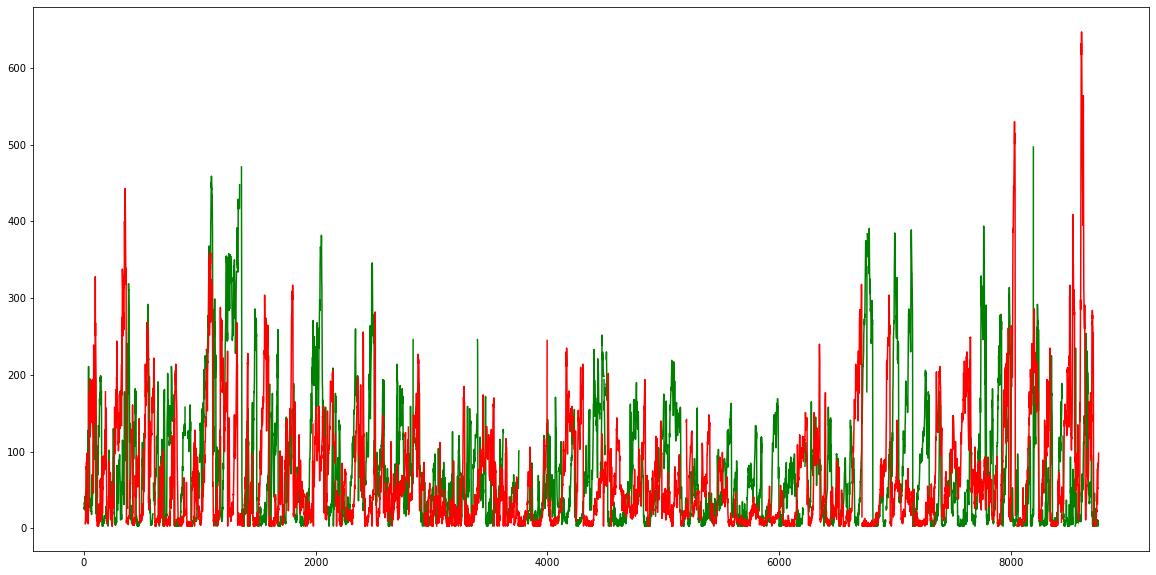

In [107]:
data13 = pmdata.loc['2013']
data14 = pmdata.loc['2014']
data15 = pmdata.loc['2015']
data16 = pmdata.loc['2016']
data17 = pmdata.loc['2017']

# overlapping = 0.15
plt.figure(figsize=(20,10))
line2 = plt.plot(range(0,len(data14)),data14, c='green')
line3 = plt.plot(range(0,len(data15)),data15, c='red')

plt.show()

In [117]:
data['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0

In [119]:
data['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['max','min']})

PM2.5  TEMP      
         max   max   min
month                   
1      443.0  12.4 -16.6
10     414.0  28.1  -1.4
11     394.0  20.8 -10.3
12     647.0  11.6  -9.7
2      881.0  14.0 -10.9
3      474.0  26.0  -6.4
4      346.0  32.0   1.3
5      358.0  41.4   7.0
6      245.0  38.1  15.1
7      252.0  39.2  16.8
8      217.0  36.3  16.6
9      240.0  34.5   7.8

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

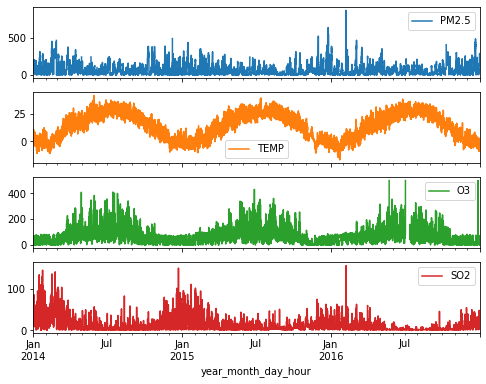

In [129]:
data1416 = data['2014':'2016']
data1416 = data1416[['PM2.5','TEMP','O3','SO2']]
data1416.plot(subplots=True)

In [135]:
data1416 = data['2014':'2016']

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

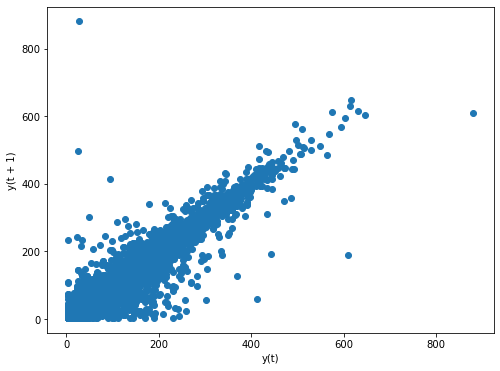

In [143]:
pd.plotting.lag_plot(data1416['PM2.5'],lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

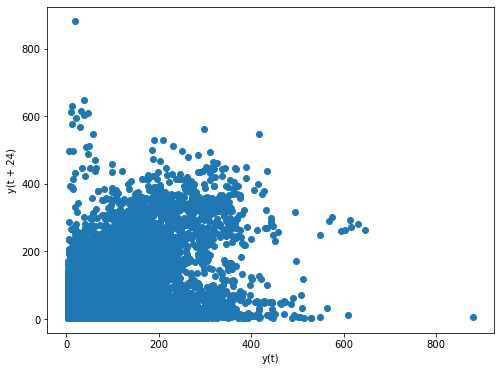

In [137]:
pd.plotting.lag_plot(data1416['PM2.5'],lag=24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 720)'>

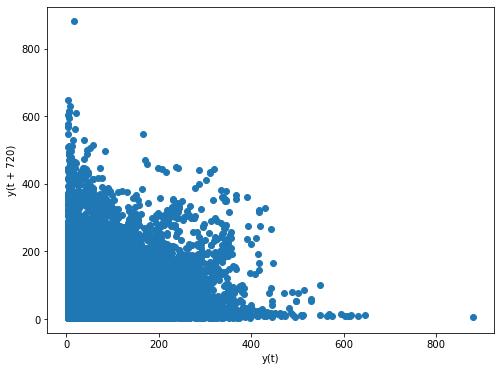

In [138]:
pd.plotting.lag_plot(data1416['PM2.5'],lag=720)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 8760)'>

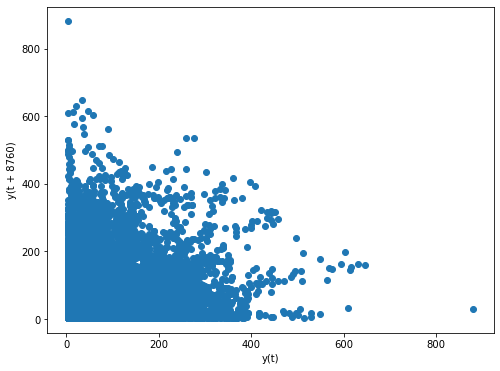

In [139]:
pd.plotting.lag_plot(data['PM2.5'],lag=8760)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2160)'>

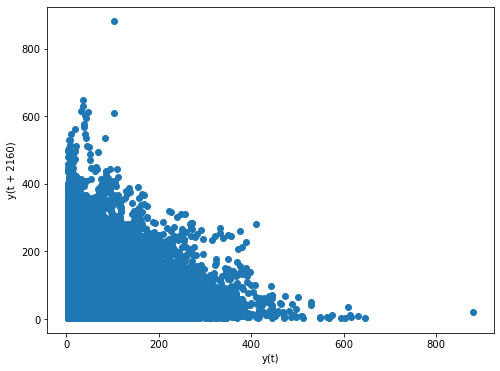

In [140]:
pd.plotting.lag_plot(data['PM2.5'],lag=2160)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4360)'>

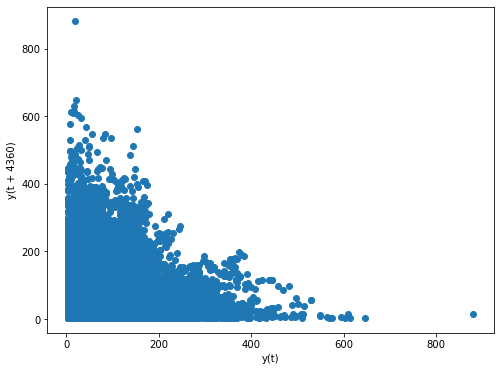

In [141]:
pd.plotting.lag_plot(data['PM2.5'],lag=4360)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

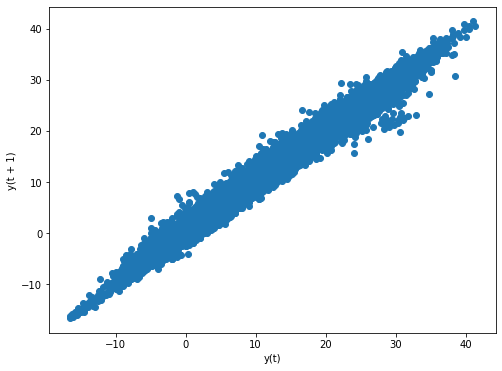

In [145]:
pd.plotting.lag_plot(data1416['TEMP'],lag=1)


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

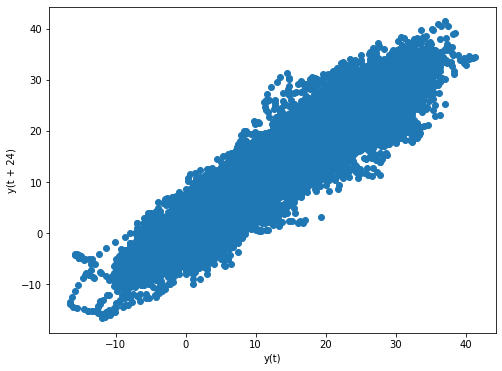

In [146]:
pd.plotting.lag_plot(data1416['TEMP'],lag=24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 720)'>

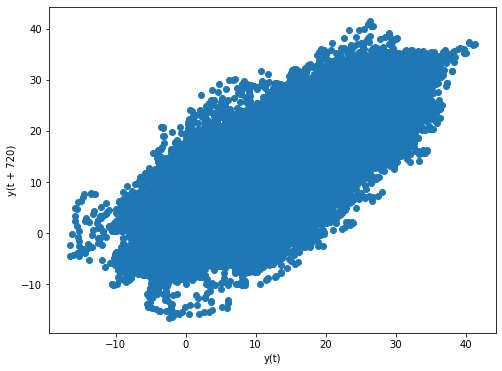

In [147]:
pd.plotting.lag_plot(data1416['TEMP'],lag=720)

In [149]:
autCorrData = data.dropna()
autCorrData

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,
2013-03-01 02:00:00,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 05:00:00,2013,3,1,5,6.0,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
2013-03-01 06:00:00,2013,3,1,6,5.0,10.0,3.0,4.0,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling
2013-03-01 07:00:00,2013,3,1,7,5.0,6.0,3.0,2.0,200.0,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling
2013-03-01 08:00:00,2013,3,1,8,8.0,7.0,3.0,3.0,200.0,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

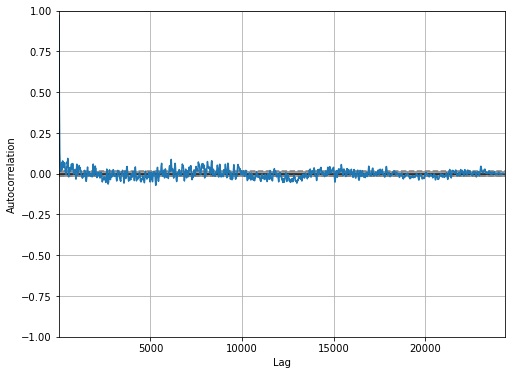

In [150]:
pd.plotting.autocorrelation_plot(autCorrData.loc['2014':'2016']['PM2.5'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

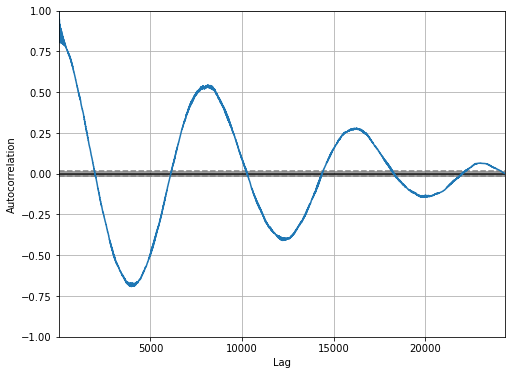

In [151]:
pd.plotting.autocorrelation_plot(autCorrData.loc['2014':'2016']['TEMP'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

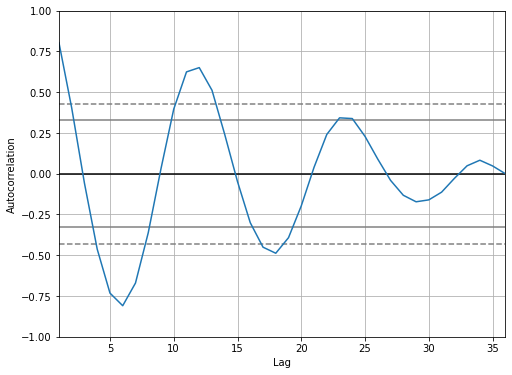

In [158]:
pd.plotting.autocorrelation_plot(autCorrData.loc['2014':'2016']['TEMP'].resample('1m').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

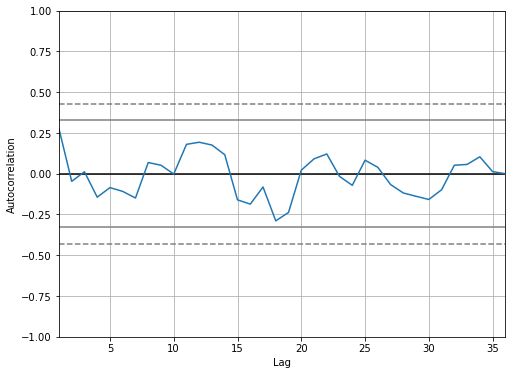

In [159]:
pd.plotting.autocorrelation_plot(autCorrData.loc['2014':'2016']['PM2.5'].resample('1m').mean())